# Hero Journey Writer - Test Notebook

Esta notebook nos permitirá probar y visualizar el funcionamiento de nuestro Hero Journey Writer.

In [1]:
import os
import sys
import ipywidgets as widgets
from IPython.display import display
sys.path.append('..')

from dotenv import load_dotenv
from langchain_anthropic import ChatAnthropic
from src.graph.hero_journey_graph import create_hero_journey_graph
from src.ui.cli import initialize_story, handle_user_interaction

# Cargar variables de entorno
load_dotenv()

# Inicializar el modelo de lenguaje
anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")
if not anthropic_api_key:
    raise ValueError("Please set the ANTHROPIC_API_KEY environment variable")

llm = ChatAnthropic(model="claude-3-opus-20240229", api_key=anthropic_api_key)

# Crear el grafo del viaje del héroe
graph = create_hero_journey_graph(llm)

## Visualización del Grafo

Vamos a visualizar la estructura de nuestro grafo del viaje del héroe.

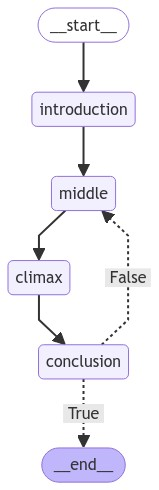

In [2]:
from IPython.display import Image, display

# Generar y mostrar la imagen del grafo
graph_image = graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

## Prueba del Flujo de la Historia

Ahora vamos a simular el flujo de creación de una historia.

In [3]:
import ipywidgets as widgets
from IPython.display import display

# Supongamos que estas funciones están definidas en tu código
# initialize_story, graph.invoke, handle_user_interaction

def run_story():
    try:
        state = initialize_story()
        
        while state['current_stage'] != 'conclusion':
            print(f"Etapa actual: {state['current_stage']}")
            state = graph.invoke(state)
            print(f"Historia generada:\n{state['story']}\n")
            
            if state['current_stage'] == 'middle':
                state['enemies'].append("El Dragón Cobarde")
                state['items'].append("Espada de la Valentía")
            elif state['current_stage'] == 'climax':
                # Crear un dropdown para seleccionar la opción en el clímax
                climax_choice_widget = widgets.Dropdown(
                    options=[('Enfrentar el desafío de frente', '1'), ('Huir del desafío', '2')],
                    value='1',
                    description='Elección:',
                )
                display(climax_choice_widget)
                
                def on_climax_choice_change(change):
                    state['climax_choice'] = change['new']
                    state = handle_user_interaction(state)
                    # Continuar la historia
                    run_story()
                
                climax_choice_widget.observe(on_climax_choice_change, names='value')
                return  # Salir de la función para esperar la interacción del usuario

            state = handle_user_interaction(state)

        print("Historia final:")
        print(state['story'])
    except Exception as e:
        print(f"Se produjo un error: {e}")
        import traceback
        print(traceback.format_exc())

# Iniciar la historia
run_story()


Welcome to the Hero's Journey Story Writer!
Let's begin by creating your hero and their world.
What is your hero's name?


In [ ]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Simulamos las funciones iniciales para que el ejemplo sea completo
def initialize_story():
    return {
        'current_stage': 'start',
        'story': 'Érase una vez...',
        'enemies': [],
        'items': [],
        'climax_choice': None,
        'protagonist': 'Héroe',
        'ally': 'Aliado'
    }

def invoke(state):
    # Simulamos el avance de las etapas
    if state['current_stage'] == 'start':
        state['current_stage'] = 'middle'
    elif state['current_stage'] == 'middle':
        state['current_stage'] = 'climax'
    elif state['current_stage'] == 'climax':
        state['current_stage'] = 'conclusion'
    return state

def handle_user_interaction(state):
    # Simulamos la interacción del usuario
    if state['climax_choice']:
        state['story'] += f"\nEl héroe decidió {state['climax_choice']}."
    return state

def run_story():
    state = initialize_story()
    
    while state['current_stage'] != 'conclusion':
        print(f"Etapa actual: {state['current_stage']}")
        state = invoke(state)
        print(f"Historia generada:\n{state['story']}\n")
        
        if state['current_stage'] == 'middle':
            state['enemies'].append("El Dragón Cobarde")
            state['items'].append("Espada de la Valentía")
        
        elif state['current_stage'] == 'climax':
            @interact(climax_choice=["Enfrentar el desafío de frente", "Huir del desafío"])
            def choose_climax(climax_choice):
                state['climax_choice'] = climax_choice
                run_story_interactive(state)
                return

    print("Historia final:")
    print(state['story'])

def run_story_interactive(state):
    state = handle_user_interaction(state)
    run_story()

# Iniciar la historia
run_story()



Etapa actual: start
Historia generada:
Érase una vez...

Etapa actual: middle
Historia generada:
Érase una vez...



: 

In [4]:
try:
    # Tu código aquí
    state = initialize_story()
    
    while state['current_stage'] != 'conclusion':
        print(f"Etapa actual: {state['current_stage']}")
        state = graph.invoke(state)
        print(f"Historia generada:\n{state['story']}\n")
        
        # Simular la interacción del usuario
        if state['current_stage'] == 'middle':
            state['enemies'].append("El Dragón Cobarde")
            state['items'].append("Espada de la Valentía")
        elif state['current_stage'] == 'climax':
            state['climax_choice'] = "1"  # Enfrentar el desafío de frente
        
        state = handle_user_interaction(state)

    print("Historia final:")
    print(state['story'])
except Exception as e:
    print(f"Se produjo un error: {e}")
    import traceback
    print(traceback.format_exc())

Welcome to the Hero's Journey Story Writer!
Let's begin by creating your hero and their world.
What is your hero's name?


## Análisis del Estado Final

Veamos el estado final de nuestra historia.

UsageError: Line magic function `%jupyter` not found.


In [ ]:
print(f"Estado final:\n{state}")